# PandasによるCSVファイルの利用とグラフ
CSVファイルを簡単に利用するためにはPythonのPandasライブラリを利用します。

Pandasを使うと多種のデータを簡単に分析、グラフ化することができます。


## pandasの利用

pandasに関する情報はいくつかまとまっているサイトがありますので、ご紹介します。

https://zenn.dev/nishimoto/articles/5c215b00edbb5b

https://qiita.com/koara-local/items/0e56bc1e58b11e4d7a32


では初めにcsvファイルをpandasで読み込んでグラフ化してみましょう。

このデータには意味がありませんので、グラフも意味のないものになっています。

In [18]:
# データを取得します。
!mkdir  csv

!wget -P csv/ https://0920shoyo.s3.ap-southeast-2.amazonaws.com/test.csv

mkdir: cannot create directory ‘csv’: File exists
--2024-09-18 11:36:41--  https://0920shoyo.s3.ap-southeast-2.amazonaws.com/test.csv
Resolving 0920shoyo.s3.ap-southeast-2.amazonaws.com (0920shoyo.s3.ap-southeast-2.amazonaws.com)... 3.5.166.178, 3.5.169.35, 52.95.131.86, ...
Connecting to 0920shoyo.s3.ap-southeast-2.amazonaws.com (0920shoyo.s3.ap-southeast-2.amazonaws.com)|3.5.166.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19 [text/csv]
Saving to: ‘csv/test.csv’

test.csv            100%[===================>]      19  --.-KB/s    in 0s      

2024-09-18 11:36:42 (719 KB/s) - ‘csv/test.csv’ saved [19/19]



データはこのような形です。

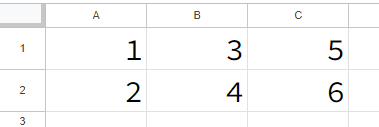

In [19]:
# 日本語グラフを表示するために必要なライブラリのインストール
!pip install japanize_matplotlib
import japanize_matplotlib

読み込んだデータは２次元（縦横の表）の場合データフレームといいます。

１次元のデータはシリーズと言われます。

読み込んだデータフレームは取り出しやグラフ化を簡単に行うことができます。

   0  1  2
0  1  3  5
1  2  4  6


<Axes: >

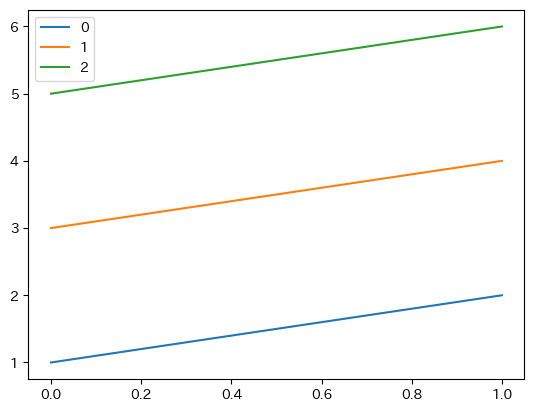

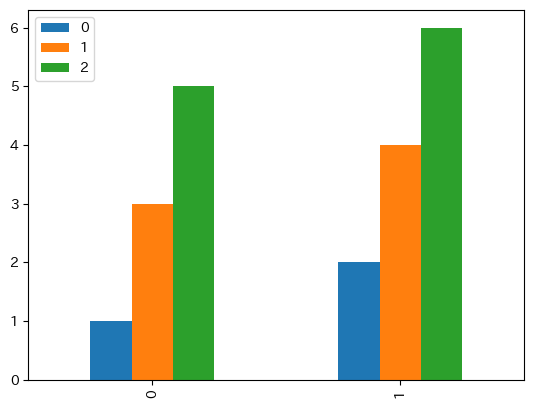

In [20]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# pandasの機能を利用してcsvファイルを読み込みます。
# CSVファイルの中身は次の通りとします。
"""
1, 3, 5
2, 4, 6
"""
# 見出し行が無いcsvファイルを読み込むときは「header=None」とします。
df = pd.read_csv('csv/test.csv', header=None)

# 読み込んだCSVの先頭部分を出力します。
print(df.head())

# 単純グラフ化します。
df.plot()

# 単純棒グラフにします。
df.plot.bar()



csvファイルの見出し行を作成してみましょう。

pandasで取り扱うデータはDataFrameと言われ、簡単に取り出し加工ができるようになっています。


     カラム名1  カラム名2  カラム名3
行名1      1      3      5
行名2      2      4      6


(array([0, 1, 2]),
 [Text(0, 0, 'カラム名1'), Text(1, 0, 'カラム名2'), Text(2, 0, 'カラム名3')])

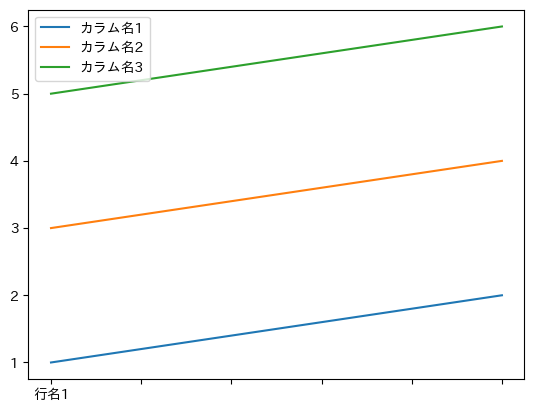

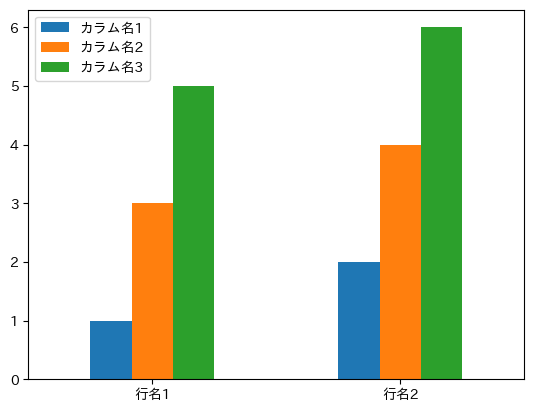

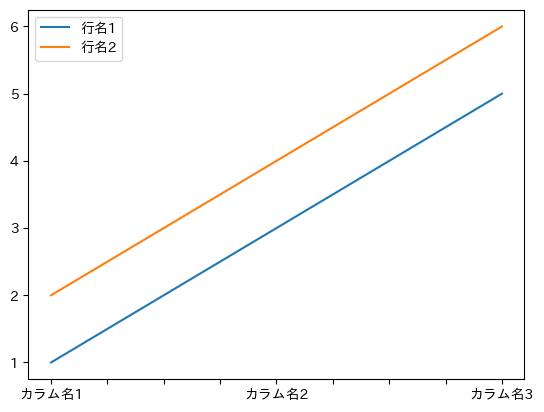

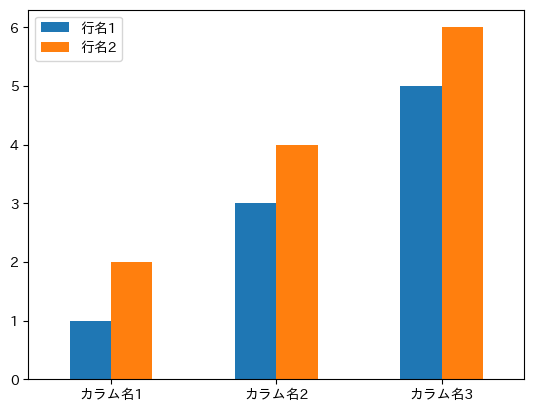

In [21]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# pandasの機能を利用してcsvファイルを読み込みます。
# CSVファイルの中身は次の通りとします。
"""
1, 3, 5
2, 4, 6
"""
# 見出し行が無いcsvファイルを読み込むときは「header=None」とします。
df = pd.read_csv('csv/test.csv', header=None)

# pandasのデータフレームに列名・行の名前を設定します。
# indexは行に名前（行見出し）を付けることになります。
# columnは列名（列見出し）を付けます。
df = pd.DataFrame(df.values,index=['行名1','行名2'], columns=['カラム名1','カラム名2', 'カラム名3'])
print(df)
# 単純グラフ化します。
df.plot()

# 単純棒グラフにします。
df.plot.bar()
plt.xticks(rotation=360)
# 行と列を入れ替える(転置という)ためには.Tを使います。
df = df.T
# 単純グラフ化します。
df.plot()


# 単純棒グラフにします。
ax = df.plot.bar()
plt.xticks(rotation=360)


## CSVファイルの事例（円山動物園の入園者）

円山動物園の２０２４年８月入場者のデータを使って分析してみましょう。

元データは以下リンク先からダウンロードします。

https://ckan.pf-sapporo.jp/dataset/sapporo_maruyama_zoo_visitors/resource/d0737809-f876-4f05-b787-9860aeedb925


In [22]:
# 円山動物園の2024年8月の入場者数をダウンロードします。
!mkdir csv
!wget -O csv/202408maruyamazoo.csv https://ckan.pf-sapporo.jp/dataset/b68bb13c-768b-4e16-8e73-50c0237f3e74/resource/d0737809-f876-4f05-b787-9860aeedb925/download/2024080120240831sapporomaruyamazoo.csv

mkdir: cannot create directory ‘csv’: File exists
--2024-09-18 11:36:51--  https://ckan.pf-sapporo.jp/dataset/b68bb13c-768b-4e16-8e73-50c0237f3e74/resource/d0737809-f876-4f05-b787-9860aeedb925/download/2024080120240831sapporomaruyamazoo.csv
Resolving ckan.pf-sapporo.jp (ckan.pf-sapporo.jp)... 34.117.110.146
Connecting to ckan.pf-sapporo.jp (ckan.pf-sapporo.jp)|34.117.110.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1643 (1.6K) [text/csv]
Saving to: ‘csv/202408maruyamazoo.csv’

csv/202408maruyamaz 100%[===================>]   1.60K  --.-KB/s    in 0s      

2024-09-18 11:36:52 (24.9 MB/s) - ‘csv/202408maruyamazoo.csv’ saved [1643/1643]



           日付  A:総入園者数  B:有料入園者数  C:無料入園者数  D:Cのうち幼児  E:Cのうち小学生  F:Cのうち中学生  \
0  2024-08-01     2311      1248      1063       332        510         78   
1  2024-08-02     2533      1418      1115       347        510        103   
2  2024-08-03     3021      1882      1139       526        396         77   
3  2024-08-04     4557      2778      1779       856        620        104   
4  2024-08-05     3702      2122      1580       574        609        107   

   G:Cのうち障がい者  H:Cのうち市内70歳以上  I:CのうちD～H以外  
0          29             44           70  
1          37             56           62  
2          53             44           43  
3          79             52           68  
4          78            113           99  


<Axes: >

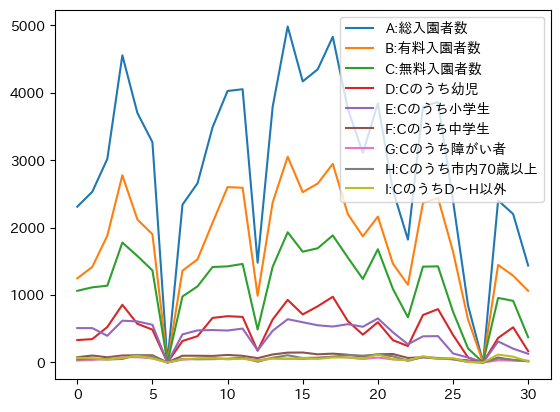

In [23]:
import pandas as pd
import matplotlib as mpl

# pandasの機能を利用してcsvファイルを読み込みます。
# csvファイルの部分をURLに変更することでリアルタイムにデータ取得できます。
df = pd.read_csv('csv/202408maruyamazoo.csv')

# データの最初の５行のみ表示します。
print(df.head())
# 単純グラフ化します。
df.plot()



丸山動物園の入場者数の内必要な列のデータのみ抽出してみましょう。

          日付  A:総入園者数  B:有料入園者数  C:無料入園者数  D:Cのうち幼児  E:Cのうち小学生  F:Cのうち中学生  \
0 2024-08-01     2311      1248      1063       332        510         78   
1 2024-08-02     2533      1418      1115       347        510        103   
2 2024-08-03     3021      1882      1139       526        396         77   
3 2024-08-04     4557      2778      1779       856        620        104   
4 2024-08-05     3702      2122      1580       574        609        107   

   G:Cのうち障がい者  H:Cのうち市内70歳以上  I:CのうちD～H以外  
0          29             44           70  
1          37             56           62  
2          53             44           43  
3          79             52           68  
4          78            113           99  


(array([19936., 19940., 19944., 19948., 19952., 19956., 19960., 19964.,
        19967.]),
 [Text(19936.0, 0, '2024-08-01'),
  Text(19940.0, 0, '2024-08-05'),
  Text(19944.0, 0, '2024-08-09'),
  Text(19948.0, 0, '2024-08-13'),
  Text(19952.0, 0, '2024-08-17'),
  Text(19956.0, 0, '2024-08-21'),
  Text(19960.0, 0, '2024-08-25'),
  Text(19964.0, 0, '2024-08-29'),
  Text(19967.0, 0, '2024-09-01')])

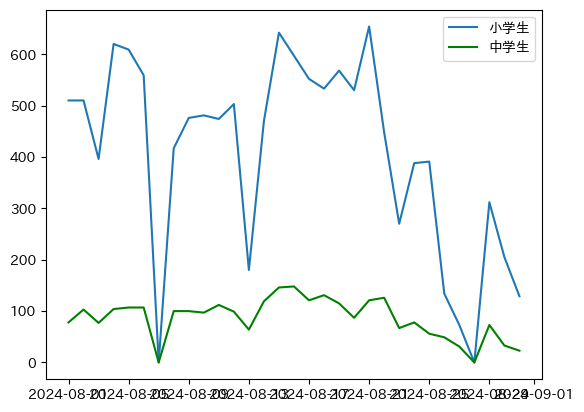

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# pandasの機能を利用してcsvファイルを読み込みます。
df = pd.read_csv('csv/202408maruyamazoo.csv',parse_dates=['日付'])

# データの最初の５行のみ表示します。
print(df.head())

# 横軸を日付としA:総入園者数を折れ線グラフで表示します。
plt.plot(df['日付'], df['E:Cのうち小学生'] ,label = '小学生')
plt.plot(df['日付'], df['F:Cのうち中学生'],
         label = '中学生', color='green')

# 凡例の表示
plt.legend()

# グラフのx軸のラベルを傾けます。
plt.xticks(rotation=0)


休園日のデータを前後データで補完することにします。

          日付  A:総入園者数  B:有料入園者数  C:無料入園者数  D:Cのうち幼児  E:Cのうち小学生  F:Cのうち中学生  \
0 2024-08-01     2311      1248      1063       332        510         78   
1 2024-08-02     2533      1418      1115       347        510        103   
2 2024-08-03     3021      1882      1139       526        396         77   
3 2024-08-04     4557      2778      1779       856        620        104   
4 2024-08-05     3702      2122      1580       574        609        107   
5 2024-08-06     3269      1903      1366       487        559        107   
6 2024-08-07        0         0         0         0          0          0   
7 2024-08-08     2341      1362       979       319        417        100   
8 2024-08-09     2659      1530      1129       390        476        100   
9 2024-08-10     3488      2072      1416       661        481         97   

   G:Cのうち障がい者  H:Cのうち市内70歳以上  I:CのうちD～H以外  
0          29             44           70  
1          37             56           62  
2          53       

(array([19936., 19940., 19944., 19948., 19952., 19956., 19960., 19964.,
        19967.]),
 [Text(19936.0, 0, '2024-08-01'),
  Text(19940.0, 0, '2024-08-05'),
  Text(19944.0, 0, '2024-08-09'),
  Text(19948.0, 0, '2024-08-13'),
  Text(19952.0, 0, '2024-08-17'),
  Text(19956.0, 0, '2024-08-21'),
  Text(19960.0, 0, '2024-08-25'),
  Text(19964.0, 0, '2024-08-29'),
  Text(19967.0, 0, '2024-09-01')])

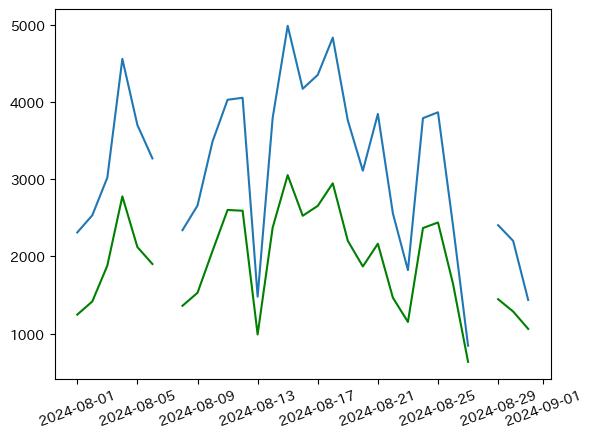

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pandasの機能を利用してcsvファイルを読み込みます。
df = pd.read_csv('csv/202408maruyamazoo.csv',parse_dates=['日付'])

# データの最初の５行のみ表示します。
print(df.head(10))

# 入園者0の日（休園日）をNaNに置き換えます。
df = df.replace([0], np.nan)

# 入園者数0=NaNの日を前後の平均値で補完します。
# total = df['A:総入園者数'].interpolate()
# pay = df['B:有料入園者数'].interpolate()
total = df['A:総入園者数']
pay = df['B:有料入園者数']

# 横軸を日付としA:総入園者数を折れ線グラフで表示します。
plt.plot(df['日付'], total)
plt.plot(df['日付'], pay, color='green')
# グラフのx軸のラベルを傾けます。
plt.xticks(rotation=20)


複数のデータを取り込み２軸グラフを作成します。

札幌市の過去の天候をダウンロードします。

https://www.data.jma.go.jp/gmd/risk/obsdl/index.php


In [26]:
# 2024年8月の札幌市の気象情報

!wget -P csv/ https://0920shoyo.s3.ap-southeast-2.amazonaws.com/202408sapporoweather.csv

--2024-09-18 11:36:54--  https://0920shoyo.s3.ap-southeast-2.amazonaws.com/202408sapporoweather.csv
Resolving 0920shoyo.s3.ap-southeast-2.amazonaws.com (0920shoyo.s3.ap-southeast-2.amazonaws.com)... 52.95.131.46, 3.5.165.120, 3.5.169.124, ...
Connecting to 0920shoyo.s3.ap-southeast-2.amazonaws.com (0920shoyo.s3.ap-southeast-2.amazonaws.com)|52.95.131.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1211 (1.2K) [text/csv]
Saving to: ‘csv/202408sapporoweather.csv.1’

202408sapporoweathe 100%[===================>]   1.18K  --.-KB/s    in 0s      

2024-09-18 11:36:55 (61.3 MB/s) - ‘csv/202408sapporoweather.csv.1’ saved [1211/1211]



          日付  A:総入園者数  B:有料入園者数  C:無料入園者数  D:Cのうち幼児  E:Cのうち小学生  F:Cのうち中学生  \
0 2024-08-01     2311      1248      1063       332        510         78   
1 2024-08-02     2533      1418      1115       347        510        103   
2 2024-08-03     3021      1882      1139       526        396         77   
3 2024-08-04     4557      2778      1779       856        620        104   
4 2024-08-05     3702      2122      1580       574        609        107   
5 2024-08-06     3269      1903      1366       487        559        107   
6 2024-08-07        0         0         0         0          0          0   
7 2024-08-08     2341      1362       979       319        417        100   
8 2024-08-09     2659      1530      1129       390        476        100   
9 2024-08-10     3488      2072      1416       661        481         97   

   G:Cのうち障がい者  H:Cのうち市内70歳以上  I:CのうちD～H以外  
0          29             44           70  
1          37             56           62  
2          53       

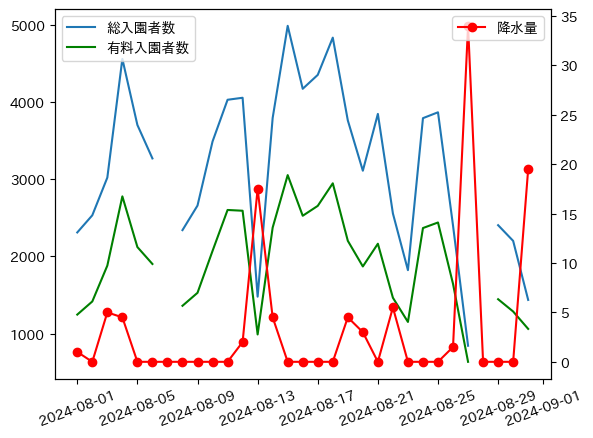

In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# pandasの機能を利用してcsvファイルを読み込みます。
# df = pd.read_csv('https://ckan.pf-sapporo.jp/dataset/b68bb13c-768b-4e16-8e73-50c0237f3e74/resource/d0737809-f876-4f05-b787-9860aeedb925/download/2024080120240831sapporomaruyamazoo.csv', parse_dates=['日付'])
df = pd.read_csv('csv/202408maruyamazoo.csv', parse_dates=['日付'])
wdf = pd.read_csv('csv/202408sapporoweather.csv',parse_dates=['年月日'], skiprows=[0,1,2,4,5])

# データの最初の10行のみ表示します。
print(df.head(10))
# データの最初の10行のみ表示します。
print(wdf.head(10))

#グラフを２軸にします。
fig = plt.figure()

# 1軸目をax1として利用できるようにします。
ax1 = fig.subplots()
# 2軸目をax2として利用できるようにします。
ax2 = ax1.twinx()

# 入園者0の日（休園日）をNaNに置き換えます。
df = df.replace([0], np.nan)

# 入園者数0=NaNの日を前後の平均値で補完します。
# total = df['A:総入園者数'].interpolate()
# pay = df['B:有料入園者数'].interpolate()
total = df['A:総入園者数']
pay = df['B:有料入園者数']

weather = wdf['降水量の合計(mm)']

# 横軸を日付としA:総入園者数を折れ線グラフで表示します。
ax1.plot(df['日付'], total, label = '総入園者数')
ax1.plot(df['日付'], pay, color='green', label = '有料入園者数')

# 入園者数の凡例を左上に表示します。
ax1.legend(loc='upper left')

# マーカーを指定して赤色にします。
ax2.plot(df['日付'], weather, color="red",  marker="o",label = '降水量')
# 降雨量の凡例を右上に表示します。
ax2.legend(loc='upper right')
# グラフのx軸のラベルを傾けます。
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=20, fontsize=10);


          日付  A:総入園者数  B:有料入園者数  C:無料入園者数  D:Cのうち幼児  E:Cのうち小学生  F:Cのうち中学生  \
0 2024-08-01     2311      1248      1063       332        510         78   
1 2024-08-02     2533      1418      1115       347        510        103   
2 2024-08-03     3021      1882      1139       526        396         77   
3 2024-08-04     4557      2778      1779       856        620        104   
4 2024-08-05     3702      2122      1580       574        609        107   
5 2024-08-06     3269      1903      1366       487        559        107   
6 2024-08-07        0         0         0         0          0          0   
7 2024-08-08     2341      1362       979       319        417        100   
8 2024-08-09     2659      1530      1129       390        476        100   
9 2024-08-10     3488      2072      1416       661        481         97   

   G:Cのうち障がい者  H:Cのうち市内70歳以上  I:CのうちD～H以外  
0          29             44           70  
1          37             56           62  
2          53       

<Axes: xlabel='A:総入園者数', ylabel='降水量の合計(mm)'>

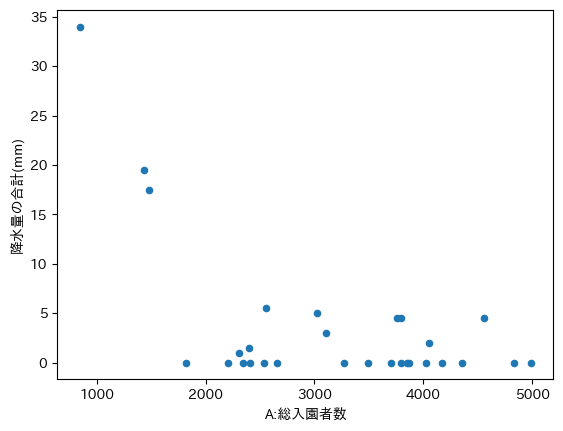

In [60]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# pandasの機能を利用してcsvファイルを読み込みます。
# df = pd.read_csv('https://ckan.pf-sapporo.jp/dataset/b68bb13c-768b-4e16-8e73-50c0237f3e74/resource/d0737809-f876-4f05-b787-9860aeedb925/download/2024080120240831sapporomaruyamazoo.csv', parse_dates=['日付'])
df = pd.read_csv('csv/202408maruyamazoo.csv', parse_dates=['日付'])
wdf = pd.read_csv('csv/202408sapporoweather.csv',parse_dates=['年月日'], skiprows=[0,1,2,4,5])

# データの最初の10行のみ表示します。
print(df.head(10))
# データの最初の10行のみ表示します。
print(wdf.head(10))

# 入園者0の日（休園日）をNaNに置き換えます。
df = df.replace([0], np.nan)

# 入園者数0=NaNの日を前後の平均値で補完します。
# total = df['A:総入園者数'].interpolate()
# pay = df['B:有料入園者数'].interpolate()
total = df['A:総入園者数']
pay = df['B:有料入園者数']

# 日付をキーとしてデータをマージします。
dfs = pd.merge(df, wdf, left_on='日付',right_on='年月日')

# 散布図の描画を行います。
dfs.plot.scatter(x='A:総入園者数', y='降水量の合計(mm)')


回帰係数： [[-0.00418779]]
切片： [16.76428157]
決定係数： 0.34833694631697987


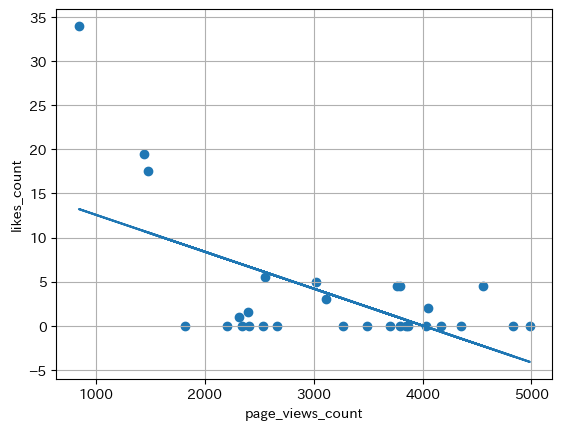

In [61]:
from sklearn import linear_model
# 回帰分析を行うときの準備です
reg = linear_model.LinearRegression()

# NaNを含む行を削除します。
dfs = dfs.dropna(how='any', axis=0)

# sklearnを使う時は、numpy形式に変換する
x = dfs.loc[:, ['A:総入園者数']].to_numpy()
y = dfs.loc[:, ['降水量の合計(mm)']].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))
plt.scatter(x, y)
plt.ylabel('likes_count')
plt.xlabel('page_views_count')
plt.plot(x, reg.predict(x))
plt.grid(True)

株価をグラフ化してみよう

stooqを使って株価を表示する銘柄を調べてみましょう。

https://stooq.com/


In [28]:
!pip install pandas-datareader

               Open     High      Low    Close        Volume
Date                                                        
2024-09-17  8339.00  8371.00  8053.00  8168.00  1.117750e+07
2024-09-13  8535.00  8544.00  8351.00  8429.00  1.141500e+07
2024-09-12  8298.00  8547.00  8273.00  8500.00  1.683210e+07
2024-09-11  7840.00  7952.00  7767.00  7874.00  1.145870e+07
2024-09-10  7843.00  7879.00  7715.00  7843.00  1.056750e+07
...             ...      ...      ...      ...           ...
2020-01-10  4766.37  4835.15  4730.00  4793.89  1.700648e+07
2020-01-09  4658.25  4746.71  4618.95  4714.28  1.911860e+07
2020-01-08  4520.67  4544.26  4443.04  4503.96  1.897492e+07
2020-01-07  4555.08  4585.54  4530.51  4565.87  1.582409e+07
2020-01-06  4605.20  4620.91  4481.37  4490.21  1.759228e+07

[1151 rows x 5 columns]


<Axes: xlabel='Date'>

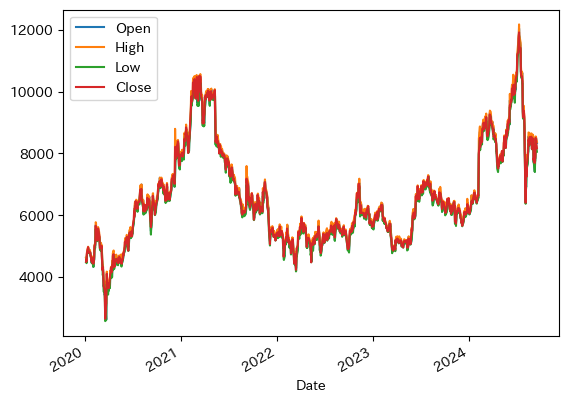

In [29]:
from pandas_datareader.stooq import StooqDailyReader
from datetime import datetime
import matplotlib.pyplot as plt

# 取得開始日時を設定します。
start = datetime(2020, 1, 1)

# 本日の日付を設定します。
end = datetime.now()

#株価を取得したい銘柄を調べてみましょう。
brand = '9984.JP'

stooq = StooqDailyReader(brand, start=start, end=end)
data = stooq.read()  # pandas.core.frame.DataFrame

# データの表示（省略して表示されます）
print(data)

data[['Open', 'High', 'Low', 'Close']].plot()


為替（ドル円）データを表示してみましょう。

ここではyahooファイナンスの機能を呼び出しますので、必要に応じてインストールしましょう。

In [30]:
!pip install yfinance

[*********************100%***********************]  4 of 4 completed
<ipython-input-31-fba13033efe5>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


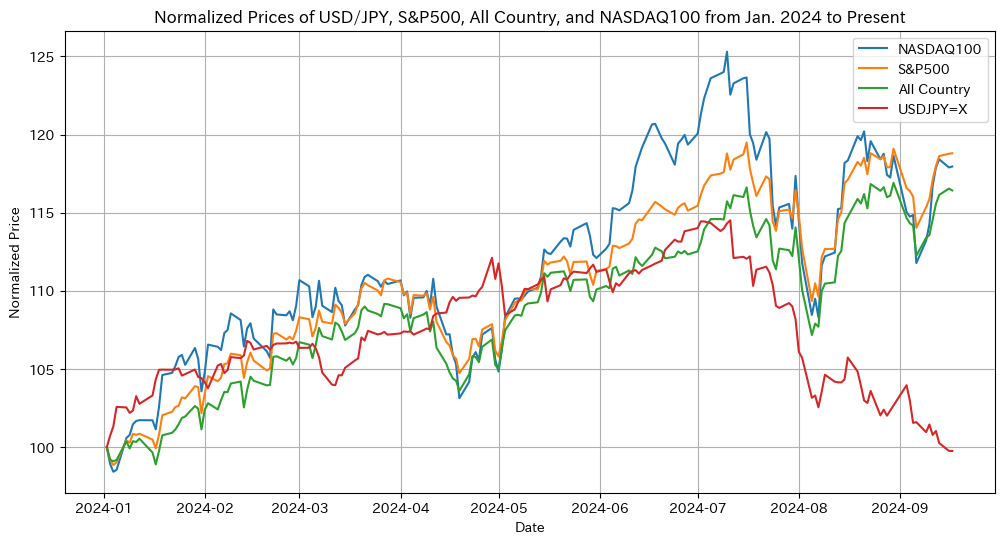

In [31]:
 #ドル建て 、NASDAQ100、S&P500、オールカントリー、ドル円を比較
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers #tickers  = ['USDJPY=X', 'SPY','ACWI', 'QQQ']
tickers = ['USDJPY=X', '^GSPC','ACWI', 'QQQ']

# Define the start and end date
start_date = '2024-01-01'
plot_start_date = '2024-01-01' #end_date  = '2023-12-31'  # Assuming current date

# Download the data #data  = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data = yf.download(tickers, start=start_date)['Adj Close']

# Drop rows with NaN and then forward fill to handle any remaining NaN values
data.dropna(inplace=True)
data.fillna(method='ffill', inplace=True)

# Normalizing the data (scaling to the first valid data point for each series)
normalized_data = data / data.iloc[0] * 100

# プロット範囲を設定
normalized_data = normalized_data[normalized_data.index >= plot_start_date]

# Plotting
plt.figure(figsize=(12, 6)) #for  ticker in normalized_data.columns:
#    plt.plot(normalized_data[ticker], label=ticker)
plt.plot(normalized_data['QQQ'], label='NASDAQ100')
plt.plot(normalized_data['^GSPC'], label='S&P500')
plt.plot(normalized_data['ACWI'], label='All Country')
plt.plot(normalized_data['USDJPY=X'], label='USDJPY=X')
plt.title('Normalized Prices of USD/JPY, S&P500, All Country, and NASDAQ100 from Jan. 2024 to Present')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# JSONデータの取り扱い

例えば次のようなデータがあります。
```
名前: 佐々木
年齢: 54
メールアドレス: sasaki@example.com
```
このデータをJSONで表現すると次のようになります。
```
{
  "名前": "佐々木",
  "年齢": 54,
  "メールアドレス": "sasaki@example.com"
}
```

Pythonでこのデータから"佐々木"を取り出すにはこのデータがdataに入っていれば次のように記述します。

```
data['名前']
```


JSONについて詳しく知りたい方はこちらをご覧ください。

https://qiita.com/shuntaro_tamura/items/5a92c517a7d95d655505


## JSONの形式で提供されるデータ
JSONはWebAPIを通して交換されるデータ形式として広く利用されています。

①有名なものは株式会社アイビスが提供している郵便番号検索APIです。

https://zipcloud.ibsnet.co.jp/api/search

次のリンクをクリックして郵便番号から住所を検索してみましょう。

https://zipcloud.ibsnet.co.jp/api/search?zipcode=065-0015

②ハートレイルズのHeartRails Expressは路線／駅名データ等の地理情報を提供しています。

https://express.heartrails.com/api/json

次のリンクをクリックして北海道の路線を表示してみましょう。

https://express.heartrails.com/api/json?method=getLines&prefecture=%E5%8C%97%E6%B5%B7%E9%81%93

③カーリル・版元ドットコムのopenBDは書誌情報・書影を提供しています。

https://api.openbd.jp/v1/get

次のリンクをクリックして書籍のISBNから書籍を検索してみましょう。

https://api.openbd.jp/v1/get?isbn=978-4938927998

※ 参考サイト「https://okumuralab.org/~okumura/python/webapi.html」


上記①の検索結果は次のようになります。

``` json:zipcodeレスポンス  
{  
    "message": null,  
    "results": [  
      {  
        "address1": "北海道",  
        "address2": "札幌市東区",  
        "address3": "北十五条東",  
        "kana1": "ﾎｯｶｲﾄﾞｳ",  
        "kana2": "ｻｯﾎﾟﾛｼﾋｶﾞｼｸ",  
        "kana3": "ｷﾀ15ｼﾞｮｳﾋｶﾞｼ",  
        "prefcode": "1",  
        "zipcode": "0650015"  
      }  
    ],  
    "status": 200  
}  
```

ブラウザアクセスではなくプログラムでデータを取得してみましょう。

In [32]:
import requests
import pprint

# 指定したURLを利用します。
url = "https://zipcloud.ibsnet.co.jp/api/search?zipcode=065-0015"
# JSON形式で読み込みます。
data = requests.get(url).json()
# JSONデータとして表示します。
pprint.pprint(data)

{'message': None,
 'results': [{'address1': '北海道',
              'address2': '札幌市東区',
              'address3': '北十五条東',
              'kana1': 'ﾎｯｶｲﾄﾞｳ',
              'kana2': 'ｻｯﾎﾟﾛｼﾋｶﾞｼｸ',
              'kana3': 'ｷﾀ15ｼﾞｮｳﾋｶﾞｼ',
              'prefcode': '1',
              'zipcode': '0650015'}],
 'status': 200}


JSON形式のデータは{　}で囲まれた「辞書」として利用することができます。
辞書形式で取得したいデータへアクセスしてみましょう。


In [33]:
import requests
import pprint

# 指定したURLを利用します。
url = "https://zipcloud.ibsnet.co.jp/api/search?zipcode=065-0015"
# JSON形式で読み込みます。
data = requests.get(url).json()

# このコメントと同じ意味になります。
# data =
# """
# {'message': None,
#  'results': [{'address1': '北海道',
#               'address2': '札幌市東区',
#               'address3': '北十五条東',
#               'kana1': 'ﾎｯｶｲﾄﾞｳ',
#               'kana2': 'ｻｯﾎﾟﾛｼﾋｶﾞｼｸ',
#               'kana3': 'ｷﾀ15ｼﾞｮｳﾋｶﾞｼ',
#               'prefcode': '1',
#               'zipcode': '0650015'}],
#  'status': 200}
# """

# 表示される内容を確認してみましょう。
pprint.pprint(data['results'])
# 表示される内容を確認してみましょう。
# print(data['results'][0])
# 表示される内容を確認してみましょう。
# print(data['results'][0]['address1'])

[{'address1': '北海道',
  'address2': '札幌市東区',
  'address3': '北十五条東',
  'kana1': 'ﾎｯｶｲﾄﾞｳ',
  'kana2': 'ｻｯﾎﾟﾛｼﾋｶﾞｼｸ',
  'kana3': 'ｷﾀ15ｼﾞｮｳﾋｶﾞｼ',
  'prefcode': '1',
  'zipcode': '0650015'}]


次に②の「ハートレイルズ」の路線図を使って北海道エリアのすべての路線を一覧表示できるようにプログラミングしてみましょう。


In [34]:
import requests
import pprint

# 指定したURLを利用します。
url = "https://express.heartrails.com/api/json?method=getLines&prefecture=北海道"
# JSON形式で読み込みます。
data = requests.get(url).json()

# 取り込んだデータを表示してみましょう。
pprint.pprint(data)
# 取り込んだデータの中から路線名のみを一覧してみましょう。


{'response': {'line': ['JR函館支線',
                       'JR函館本線',
                       'JR千歳線',
                       'JR宗谷本線',
                       'JR室蘭支線',
                       'JR室蘭本線',
                       'JR富良野線',
                       'JR日高本線',
                       'JR札沼線',
                       'JR根室本線',
                       '道南いさりび鉄道線',
                       'JR海峡線',
                       'JR留萌本線',
                       'JR石勝線',
                       'JR石北本線',
                       'JR釧網本線',
                       '函館市電宝来・谷地頭線',
                       '函館市電本線',
                       '函館市電湯の川線',
                       '札幌市南北線',
                       '札幌市東西線',
                       '札幌市東豊線',
                       '札幌市電',
                       '北海道新幹線']}}


応用編としてISBNを使って書籍情報にアクセスし必要な情報を取り出してみましょう。

データを参照するにはブラウザのDevToolsを使って表示されている値を整形してみましょう。


In [35]:
# コードはここに書きましょう。

## お近くの観測所データを使って気象データを視覚化してみましょう。

http://agora.ex.nii.ac.jp/digital-typhoon/amedas/


全てのデータに対してグラフ化処理をするために次のプログラムではリストをうまく使っています。

In [36]:
!pip install japanize_matplotlib

In [37]:
from datetime import datetime, timedelta, timezone

# タイムゾーンの生成
JST = timezone(timedelta(hours=+9), 'JST')

today = datetime.now(JST)
print(today)
d = format(today, '%Y%m%d')
h = '{:0=2}'.format(int(int(format(today, '%H')) / 3) * 3)
print(h)

2024-09-18 20:37:17.083663+09:00
18


18.5


Text(0, 0.5, '気温')

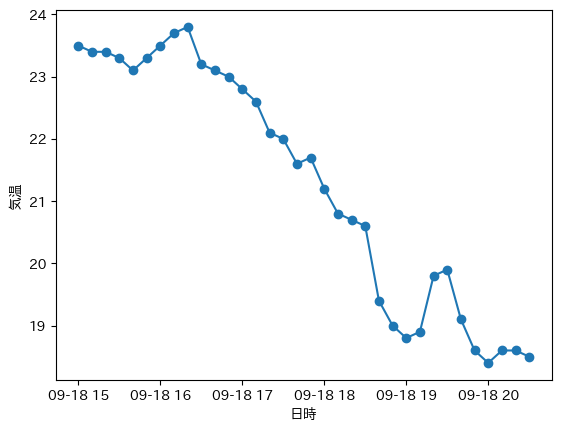

In [38]:
!pip install japanize_matplotlib
import requests
import matplotlib.pyplot as plt
import japanize_matplotlib
import pprint
import pandas as pd

from datetime import datetime, timedelta, timezone

# タイムゾーンの生成
JST = timezone(timedelta(hours=+9), 'JST')

today = datetime.now(JST)
d = format(today, '%Y%m%d')
h = '{:0=2}'.format(int(int(format(today, '%H')) / 3) * 3)


url = "https://www.jma.go.jp/bosai/amedas/data/point/14163/" + d + "_" + h + ".json"
data = requests.get(url).json()
h2 = '{:0=2}'.format(int(int(format(today, '%H')) / 3) * 3 - 3)
url = "https://www.jma.go.jp/bosai/amedas/data/point/14163/" + d + "_" + h2 + ".json"
data2 = requests.get(url).json()

# 取り込んだデータを整形して表示します。
t = [pd.to_datetime(k) for k in data.keys()]
x = [data[k]['temp'][0] for k in data.keys()]
t2 = [pd.to_datetime(k) for k in data2.keys()]
x2 = [data2[k]['temp'][0] for k in data2.keys()]
print(x[len(x)-1])
t2.extend(t)
x2.extend(x)

plt.plot(t2, x2, "o-")
plt.xlabel("日時")
plt.ylabel("気温")
